# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 659


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | maldonado
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | juneau
Processing Record 9 of Set 1 | sao francisco
Processing Record 10 of Set 1 | saint-augustin
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | nieuw amsterdam
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | lorengau
Processing Record 17 of Set 1 | kitimat
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | nicolas bravo
Processing 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pevek,69.7008,170.3133,-0.40,86,58,10.89,RU,1681507225
1,busselton,-33.6500,115.3333,58.14,69,95,8.77,AU,1681507225
2,hermanus,-34.4187,19.2345,57.76,64,32,5.95,ZA,1681507226
3,maldonado,-34.6667,-54.9167,58.23,61,9,7.87,UY,1681507226
4,punta arenas,-53.1500,-70.9167,44.71,61,75,4.61,CL,1681507014


In [11]:
import os
os.makedirs("output_data", exist_ok=True)

In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pevek,69.7008,170.3133,-0.40,86,58,10.89,RU,1681507225
1,busselton,-33.6500,115.3333,58.14,69,95,8.77,AU,1681507225
2,hermanus,-34.4187,19.2345,57.76,64,32,5.95,ZA,1681507226
3,maldonado,-34.6667,-54.9167,58.23,61,9,7.87,UY,1681507226
4,punta arenas,-53.1500,-70.9167,44.71,61,75,4.61,CL,1681507014


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

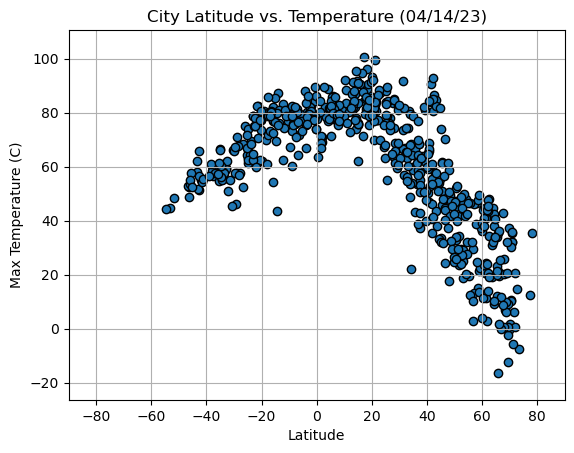

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.xlim(-90, 90)
plt.ylim(min(city_data_df["Max Temp"])-10, max(city_data_df["Max Temp"])+10)

plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

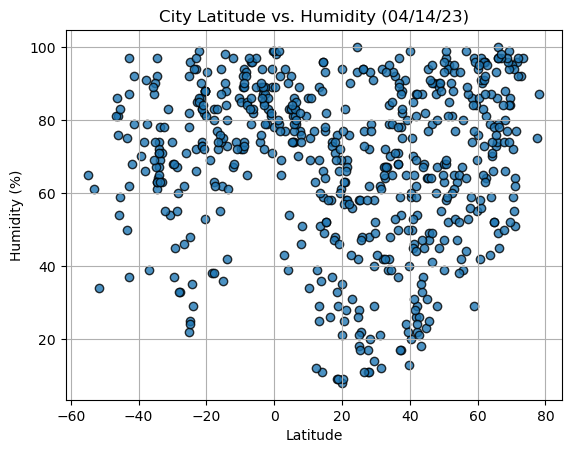

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

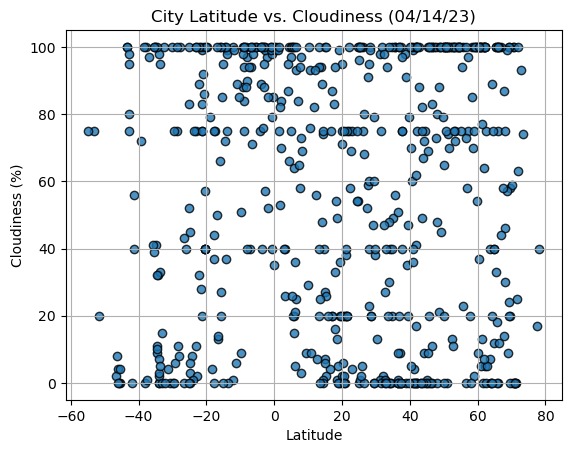

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

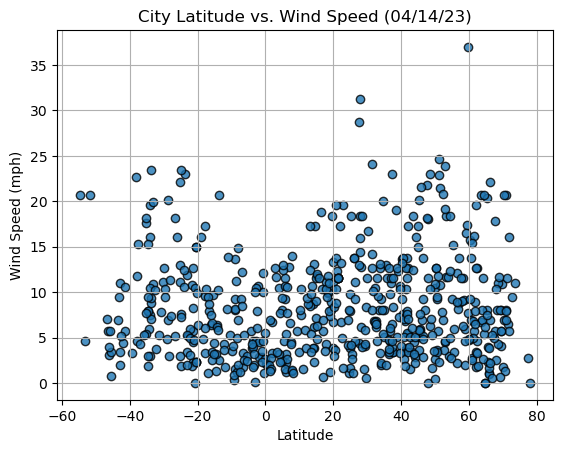

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    print(f"The r-squared is: {rvalue**2}")

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pevek,69.7008,170.3133,-0.40,86,58,10.89,RU,1681507225
6,qaanaaq,77.4840,-69.3632,12.58,75,17,2.73,GL,1681507227
7,juneau,58.3019,-134.4197,46.42,74,100,11.50,US,1681507227
9,saint-augustin,51.2260,-58.6502,41.76,52,74,22.91,CA,1681507228
10,kapaa,22.0752,-159.3190,77.18,76,75,17.27,US,1681506976


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,busselton,-33.6500,115.3333,58.14,69,95,8.77,AU,1681507225
2,hermanus,-34.4187,19.2345,57.76,64,32,5.95,ZA,1681507226
3,maldonado,-34.6667,-54.9167,58.23,61,9,7.87,UY,1681507226
4,punta arenas,-53.1500,-70.9167,44.71,61,75,4.61,CL,1681507014
5,port elizabeth,-33.9180,25.5701,60.31,74,0,19.57,ZA,1681507226


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
from scipy.stats import linregress

The r-squared is: 0.7243411234210219


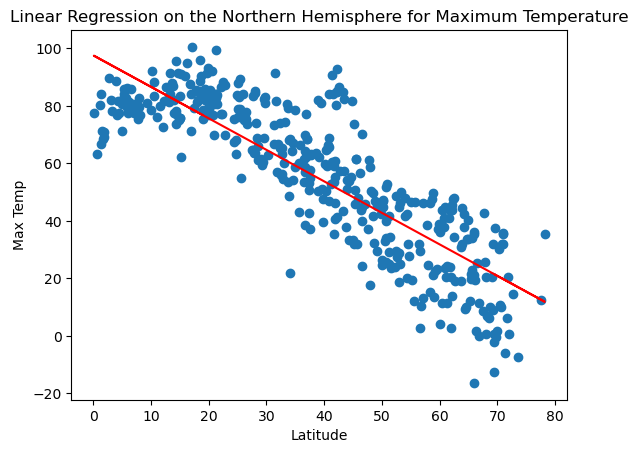

In [55]:
# Linear regression on Northern Hemisphere
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (0, -30))


The r-squared is: 0.6318120471185157


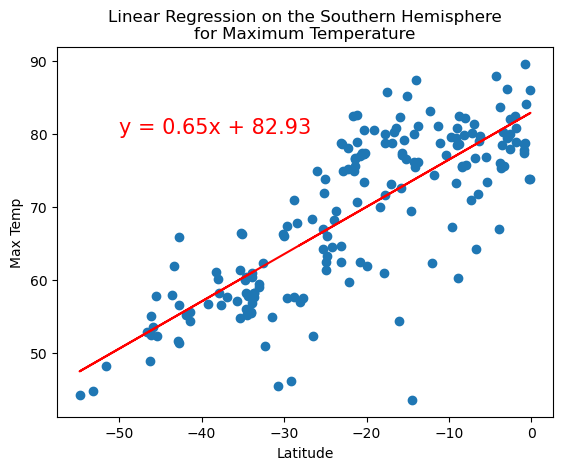

In [56]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Linear Regression on the Southern Hemisphere\nfor Maximum Temperature", "Max Temp", (-50, 80))


**Discussion about the linear relationship:** Its clear to see that in both graghs in the regression line seems to be fitted in a way that it shows that it seems to be a good fit. Especailly in the norhtern hemisphere with a percentage that is higher of that than the South. I also find it interesting that the both graghs are going in different directions. Meanign that as you move closer to zero, temperatures are at its highest and as you move away the closer to colder weather you get.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.033947090899613536


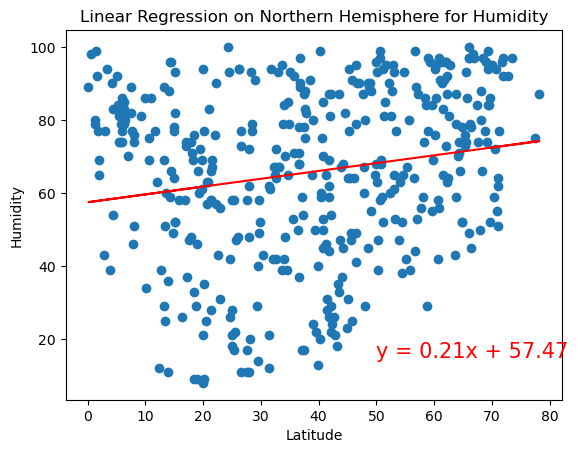

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Humidity", "Humidity", (50,15))

The r-squared is: 0.11861774765734397


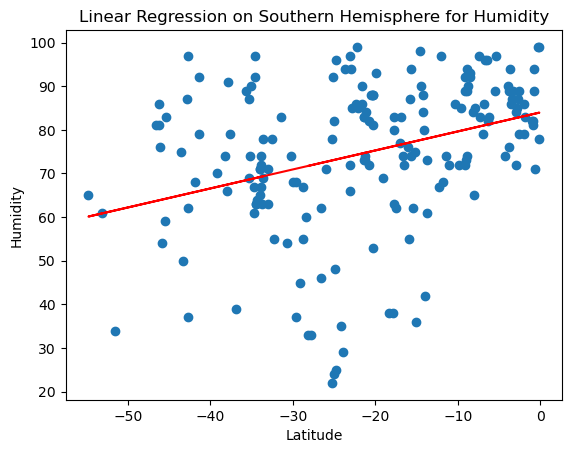

In [61]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on Southern Hemisphere for Humidity", "Humidity", (50,15))

**Discussion about the linear relationship:** It can clearly be seen that there isnt a stong relationship between humidity and location. The scatter plots are all over the place and both r squared values are less than .2 meaning that there doent seem to be a relatinjsip between the two variabels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0011027912481821748


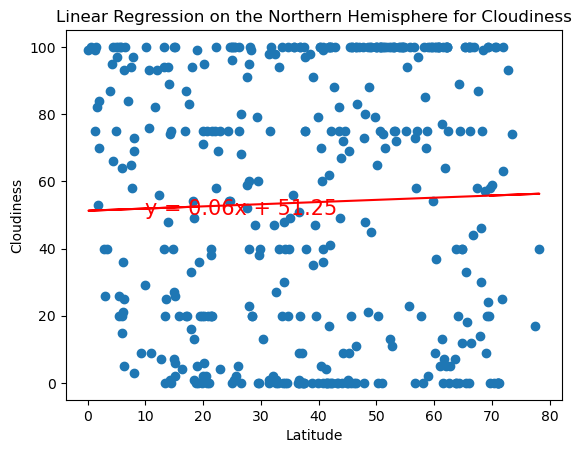

In [63]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Cloudiness','Cloudiness', (10,50))

The r-squared is: 0.1554988274432214


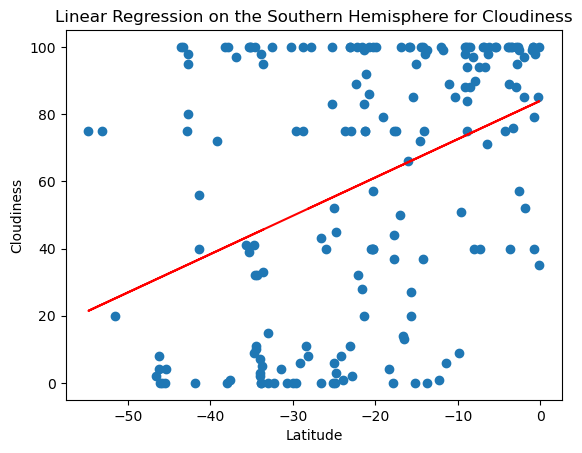

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Cloudiness','Cloudiness', (10,50))

**Discussion about the linear relationship:** The same conclusion can be drawn when it comes to cloudiness both graghs show a bit of clustering on the top and in the Notheren hemisphere in the bottom as well hence why the line is horizontal. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.005116671720454553


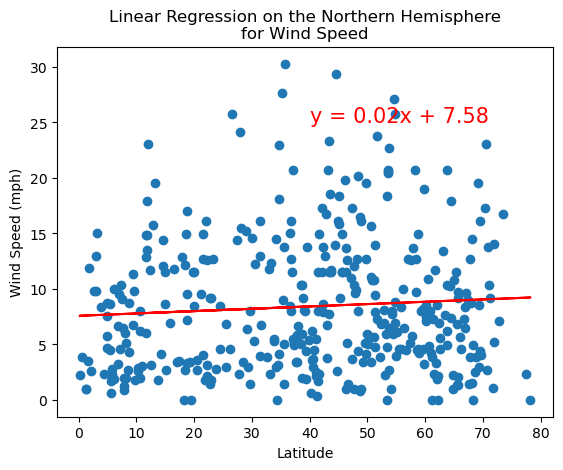

In [45]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Linear Regression on the Northern Hemisphere\nfor Wind Speed", "Wind Speed (mph)", (40,25))

The r-squared is: 0.20867797756513726


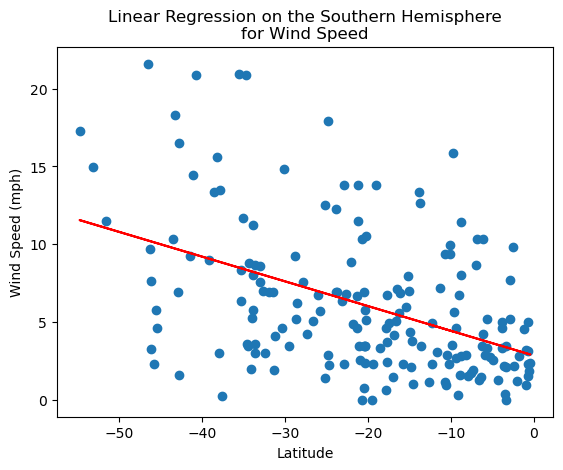

In [47]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Linear Regression on the Southern Hemisphere\nfor Wind Speed", "Wind Speed (mph)", (40,25))

**Discussion about the linear relationship:** It looks as if in the Southern hemisphere there is a stonger r squared as the values are mostly clustered on the bottom right as opposed to the northern hemisphere where most scattter plot points are at the bottom.This could indicate that in the case of the southern hemisphere as you get closeer winds tend ot be slower but in the north wind is a bit more random in that case as you can see that the points are all overe the place